In [5]:
print(7 / 0.25)

28.0


In [12]:
e = 0.25

In [13]:
import numpy as np
np.arange(-e, e+e, e)

array([-0.25,  0.  ,  0.25])

In [239]:
import numpy as np
import matplotlib.pyplot as plt

def expand_matrix(matrix, n, step=1):
    expanded_matrix = {}

    for key, value in matrix.items():
        x = key[1:-1].split(', ')[0]
        y = key[1:-1].split(', ')[1]
        if '.' in x:
            x = float(x)
        else:
            x = int(x)
        if '.' in y:
            y = float(y)
        else:
            y = int(y)

        expanded_matrix[key] = value

        if n > 0:
            x_step = step / (n + 1)
            y_step = step / (n + 1)

            for i in np.arange(1, n + 1):
                x_offset = x_step * i
                y_offset = y_step * i

                # Calculate the x and y indices of the neighbors
                neighbors = [
                    (x - x_offset, y), (x + x_offset, y),  # Horizontal neighbors
                    (x, y - y_offset), (x, y + y_offset),  # Vertical neighbors
                    (x - x_offset, y - y_offset), (x - x_offset, y + y_offset),  # Diagonal neighbors
                    (x + x_offset, y - y_offset), (x + x_offset, y + y_offset)
                ]

                # Calculate the average of all neighbors
                total_average = sum(expanded_matrix.get(str([nx, ny]), value) for nx, ny in neighbors)
                average = total_average / len(neighbors)

                # Insert the new items into the expanded matrix
                for nx, ny in neighbors:
                    inserted_key = str([nx, ny])
                    expanded_matrix[inserted_key] = average

    # Calculate the dimensions of the expanded matrix
    all_x, all_y = zip(*[map(float, key[1:-1].split(', ')) for key in expanded_matrix])
    max_x, max_y = max(all_x), max(all_y)
    min_x, min_y = min(all_x), min(all_y)

    # Convert the expanded matrix to a 2D list format
    x_range = np.arange(min_x, max_x + x_step, x_step)
    y_range = np.arange(min_y, max_y + y_step, y_step)

    x_range = [int(x) if x.is_integer() else x for x in x_range]
    y_range = [int(x) if x.is_integer() else x for x in y_range]

    print(x_range)
    print(y_range)

    print(expanded_matrix.keys())


    expanded_matrix_2d = [[expanded_matrix[str([x, y])] for y in y_range] for x in x_range]

    return expanded_matrix_2d, expanded_matrix

def calculate_average(item1, item2):
    return (item1 + item2) / 2

[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
dict_keys(['[1, 1]', '[0.5, 1]', '[1.5, 1]', '[1, 0.5]', '[1, 1.5]', '[0.5, 0.5]', '[0.5, 1.5]', '[1.5, 0.5]', '[1.5, 1.5]', '[1, 2]', '[0.5, 2]', '[1.5, 2]', '[1, 2.5]', '[0.5, 2.5]', '[1.5, 2.5]', '[1, 3]', '[0.5, 3]', '[1.5, 3]', '[1, 3.5]', '[0.5, 3.5]', '[1.5, 3.5]', '[1, 4]', '[0.5, 4]', '[1.5, 4]', '[1, 4.5]', '[0.5, 4.5]', '[1.5, 4.5]', '[2, 1]', '[2.5, 1]', '[2, 0.5]', '[2, 1.5]', '[2.5, 0.5]', '[2.5, 1.5]', '[2, 2]', '[2.5, 2]', '[2, 2.5]', '[2.5, 2.5]', '[2, 3]', '[2.5, 3]', '[2, 3.5]', '[2.5, 3.5]', '[2, 4]', '[2.5, 4]', '[2, 4.5]', '[2.5, 4.5]', '[3, 1]', '[3.5, 1]', '[3, 0.5]', '[3, 1.5]', '[3.5, 0.5]', '[3.5, 1.5]', '[3, 2]', '[3.5, 2]', '[3, 2.5]', '[3.5, 2.5]', '[3, 3]', '[3.5, 3]', '[3, 3.5]', '[3.5, 3.5]', '[3, 4]', '[3.5, 4]', '[3, 4.5]', '[3.5, 4.5]', '[4, 1]', '[4.5, 1]', '[4, 0.5]', '[4, 1.5]', '[4.5, 0.5]', '[4.5, 1.5]', '[4, 2]', '[4.5, 2]', '[4, 2.5]', '[4.5, 2.5]', '[4, 3]', '[4.5, 3]

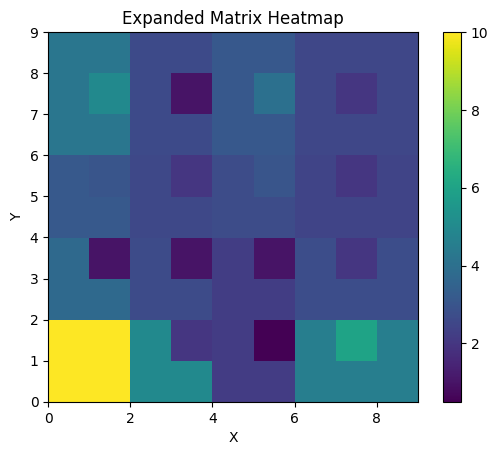

[0.125, 0.375, 0.625, 0.875, 1.125, 1.375, 1.625, 1.875, 2.125, 2.375, 2.625, 2.875, 3.125, 3.375, 3.625, 3.875, 4.125, 4.375, 4.625, 4.875]
[0.125, 0.375, 0.625, 0.875, 1.125, 1.375, 1.625, 1.875, 2.125, 2.375, 2.625, 2.875, 3.125, 3.375, 3.625, 3.875, 4.125, 4.375, 4.625, 4.875]
dict_keys(['[1, 1]', '[0.75, 1]', '[1.25, 1]', '[1, 0.75]', '[1, 1.25]', '[0.75, 0.75]', '[0.75, 1.25]', '[1.25, 0.75]', '[1.25, 1.25]', '[0.625, 1]', '[1.375, 1]', '[1, 0.625]', '[1, 1.375]', '[0.625, 0.625]', '[0.625, 1.375]', '[1.375, 0.625]', '[1.375, 1.375]', '[0.5, 1]', '[0.25, 1]', '[0.5, 0.75]', '[0.5, 1.25]', '[0.25, 0.75]', '[0.25, 1.25]', '[0.125, 1]', '[0.875, 1]', '[0.5, 0.625]', '[0.5, 1.375]', '[0.125, 0.625]', '[0.125, 1.375]', '[0.875, 0.625]', '[0.875, 1.375]', '[1.5, 1]', '[1.75, 1]', '[1.5, 0.75]', '[1.5, 1.25]', '[1.75, 0.75]', '[1.75, 1.25]', '[1.125, 1]', '[1.875, 1]', '[1.5, 0.625]', '[1.5, 1.375]', '[1.125, 0.625]', '[1.125, 1.375]', '[1.875, 0.625]', '[1.875, 1.375]', '[1, 0.5]', '[0

KeyError: '[0.125, 0.375]'

In [240]:
matrix = {
    '[1, 1]': 10,
    '[1, 2]': 2,
    '[1, 3]': 0.5,
    '[1, 4]': 6,
    '[2, 1]': 1,
    '[2, 2]': 1,
    '[2, 3]': 1,
    '[2, 4]': 2,
    '[3, 1]': 3,
    '[3, 2]': 2,
    '[3, 3]': 3,
    '[3, 4]': 2,
    '[4, 1]': 5,
    '[4, 2]': 1,
    '[4, 3]': 4,
    '[4, 4]': 2
}

expanded_matrix, matrix = expand_matrix(matrix, 1)

plt.imshow(expanded_matrix, cmap='viridis', origin='lower', extent=[0, len(expanded_matrix[0]), 0, len(expanded_matrix)])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Expanded Matrix Heatmap')
plt.show()

expanded_matrix2, matrix2 = expand_matrix(matrix, 1, 0.5)

plt.imshow(expanded_matrix2, cmap='viridis', origin='lower', extent=[0, len(expanded_matrix2[0]), 0, len(expanded_matrix2)])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Expanded Matrix Heatmap')
plt.show()

In [204]:
matrix

{'[1, 1]': 10,
 '[0.5, 1]': 10.0,
 '[1.5, 1]': 3.75,
 '[1, 0.5]': 10.0,
 '[1, 1.5]': 5.0,
 '[0.5, 0.5]': 10.0,
 '[0.5, 1.5]': 5.0,
 '[1.5, 0.5]': 3.75,
 '[1.5, 1.5]': 2.6796875,
 '[1, 2]': 2,
 '[0.5, 2]': 5.0,
 '[1.5, 2]': 2.6796875,
 '[1, 2.5]': 2.1875,
 '[0.5, 2.5]': 2.1875,
 '[1.5, 2.5]': 2.224609375,
 '[1, 3]': 0.5,
 '[0.5, 3]': 2.1875,
 '[1.5, 3]': 2.224609375,
 '[1, 3.5]': 4.5703125,
 '[0.5, 3.5]': 4.5703125,
 '[1.5, 3.5]': 2.726806640625,
 '[1, 4]': 6,
 '[0.5, 4]': 4.5703125,
 '[1.5, 4]': 2.726806640625,
 '[1, 4.5]': 4.5703125,
 '[0.5, 4.5]': 4.5703125,
 '[1.5, 4.5]': 2.726806640625,
 '[2, 1]': 1,
 '[2.5, 1]': 3.1474609375,
 '[2, 0.5]': 3.75,
 '[2, 1.5]': 2.6796875,
 '[2.5, 0.5]': 3.1474609375,
 '[2.5, 1.5]': 2.5433349609375,
 '[2, 2]': 1,
 '[2.5, 2]': 2.5433349609375,
 '[2, 2.5]': 2.224609375,
 '[2.5, 2.5]': 2.6976776123046875,
 '[2, 3]': 1,
 '[2.5, 3]': 2.6976776123046875,
 '[2, 3.5]': 2.726806640625,
 '[2.5, 3.5]': 2.443330764770508,
 '[2, 4]': 2,
 '[2.5, 4]': 2.4433307647705

In [187]:
expanded_matrix

[[10.0, 10.0, 5.0, 5.0, 2.1875, 2.1875, 4.5703125, 4.5703125, 4.5703125],
 [10.0, 0, 5.0, 0, 2.1875, 0, 4.5703125, 0, 4.5703125],
 [3.75,
  3.75,
  2.6796875,
  2.6796875,
  2.224609375,
  2.224609375,
  2.726806640625,
  2.726806640625,
  2.726806640625],
 [3.75, 0, 2.6796875, 0, 2.224609375, 0, 2.726806640625, 0, 2.726806640625],
 [3.1474609375,
  3.1474609375,
  2.5433349609375,
  2.5433349609375,
  2.6976776123046875,
  2.6976776123046875,
  2.443330764770508,
  2.443330764770508,
  2.443330764770508],
 [3.1474609375,
  0,
  2.5433349609375,
  0,
  2.6976776123046875,
  0,
  2.443330764770508,
  0,
  2.443330764770508],
 [4.2297821044921875,
  4.2297821044921875,
  2.6162948608398438,
  2.6162948608398438,
  3.123736619949341,
  3.123736619949341,
  2.5322339236736298,
  2.5322339236736298,
  2.5322339236736298],
 [4.2297821044921875,
  0,
  2.6162948608398438,
  0,
  3.123736619949341,
  0,
  2.5322339236736298,
  0,
  2.5322339236736298],
 [4.2297821044921875,
  4.229782104492187